<a href="https://colab.research.google.com/github/ShreeKeshavan/Machine_Learning/blob/main/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

### **Basics Of Linear Regression**

8.013459823238465 10.76915592313307


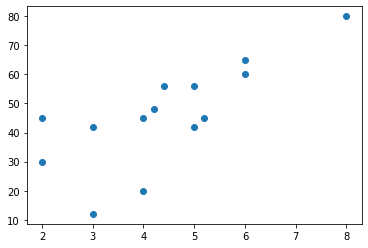

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

x = [2,3,4,4.4,5,5.2,4.2,6.0,8,5,6,2,3,4]
y = [30,42,45,56,42,45,48,60,80,56,65,45,12,20] #Data set

slope, intercept,r,p,std_err = stats.linregress(x,y) #To calculate the slope,intercept of the best line , R, P, standard error using scipy.
print(slope,intercept)

plt.scatter(x,y) #To plot the scatter of x,y 
plt.show()





[26.79607556961, 34.80953539284847, 42.82299521608693, 46.02837914538232, 50.836455039325394, 52.43914700397309, 44.42568718073463, 58.849914862563864, 74.87683450904079, 50.836455039325394, 58.849914862563864, 26.79607556961, 34.80953539284847, 42.82299521608693]


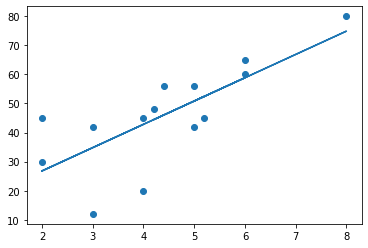

In [ ]:
def myfunc(x,slope,intercept): #To find (y = mx+c) x is m, slope is x, intercept is c.
  return x*slope+intercept #To find y 

slope, intercept,r,p,std_err = stats.linregress(x,y) #To calculate the slope,intercept of the best line , R, P, standard error using scipy.

new_y = []
for x_value in x:
  temp_y = myfunc(x_value,slope,intercept)
  new_y.append(temp_y)
print(new_y) #To find the new y (predicted y)

plt.scatter(x,y)
plt.plot(x,new_y) #Plot the new_y (minimum error line)
plt.show() 


# **SCORE DATA SET**

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


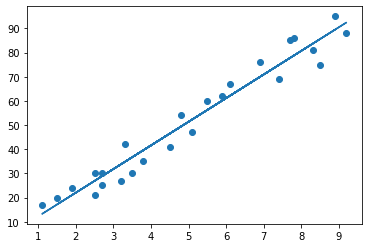

In [ ]:
#SCORE_DATASET (simple_linear_Regression)
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

df = pd.read_csv("/content/score.csv")
print(df) 

X = df['Hours'].values
y = df['Scores'].values
slope,intercept,r,p,Std_err = stats.linregress(X,y)#To find (y = mx+c) x is m, slope is x, intercept is c, r is distance of plot from line,

def myfunc(x):
  return slope*x +intercept #(y = mx+c)

predicted_y = []
for x_value in X:
  predicted_y.append(myfunc(x_value)) # Precting the minimum error line

plt.scatter(X,y)
plt.plot(X,predicted_y) #Plotting the minmum error line
plt.show()


### **Finding Rscore,Intercept**

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

x = np.array([2,3,4,5,1,5,6,7,8,9,10]).reshape(-1,1) #the data should need to be in array while fit
y = np.array([23,45,23,45,26,67,87,45,67,23,45])

lr = LinearRegression()
lr.fit(x,y)
print("score for regression : ",lr.score(x,y))#To find the R score
print("LR intercept : ",lr.intercept_) #to find the intercept


score for regression :  0.08960110378080532
LR intercept :  32.98901098901099


# **Tv_Marketing Data set**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/tvmarketing.csv")

In [ ]:
print(df.info()) #Information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB
None


In [ ]:
print(df.describe()) #Description of the data

               TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


<AxesSubplot:xlabel='TV', ylabel='Sales'>

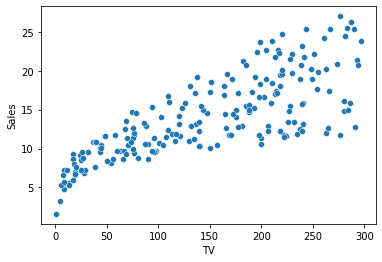

In [ ]:
sns.scatterplot(data=df, x="TV", y="Sales")

In [ ]:
#Line formula - y = m1x1+m0 
# Equation for this dataset - Sales = m1*TV+m0
X = df[["TV"]] 
Y = df["Sales"]

#Splitting 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0) #can give anyone test_size or train_size. 

lr = LinearRegression() #creating object.
lr.fit(X_train,Y_train) #Always use train data in fit.

print("score for regression : ",lr.score(X_train,Y_train))#To find the R score.
print("LR intercept : ",lr.intercept_) #to find the intercept.
print("Coeff : ", lr.coef_ ) #slope

score for regression :  0.5552336104251212
LR intercept :  7.310810165411681
Coeff :  [0.04581434]


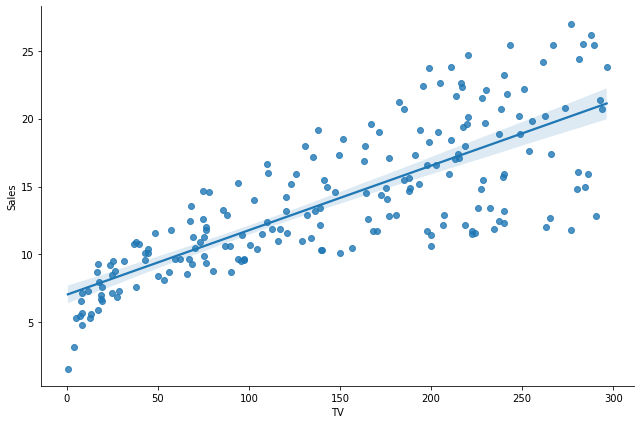

In [ ]:
#Prediction
Y_predicted = lr.predict(X_train) 
sns.lmplot(x ='TV', y = 'Sales', data=df,aspect=1.5,height=6) #To visualise prediction using lmplot.

In [ ]:
#Computating the Train ERROR
print(sum(abs(Y_train - Y_predicted))/len(Y_train)) # formula of mean of the error - sum(predicted - actual)2/n

2.782980807882148


In [ ]:
# Predicting test data
y_test_predicted = lr.predict(X_test)

In [ ]:
#Computating the Test ERROR
print(sum(abs(Y_test - y_test_predicted))/len(Y_test)) # formula of mean of the error - sum(predicted - actual)2/n

2.0575465794300083


# **Tips Dataset**

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = sns.load_dataset('tips')
print(df)


     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


## **Encoding**

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #converting categorical to numeric values
#Gender column
le.fit(df['sex']) #fitting the feature to transform to numerical to chnage gender colum to numeric
le.transform(df['sex']) #transforming gender column to numerical
df['sex'] = le.transform(df['sex']) # making the changes permanent in df
#smoker column
le.fit(df['smoker'])
df['smoker'] = le.transform(df['smoker'])
#day column
le.fit(df['day'])
df['day'] = le.transform(df['day'])
#time column
le.fit(df['time'])
df['time'] = le.transform(df['time'])

print(df)

     total_bill   tip  sex  smoker  day  time  size
0         16.99  1.01    0       0    2     0     2
1         10.34  1.66    1       0    2     0     3
2         21.01  3.50    1       0    2     0     3
3         23.68  3.31    1       0    2     0     2
4         24.59  3.61    0       0    2     0     4
..          ...   ...  ...     ...  ...   ...   ...
239       29.03  5.92    1       0    1     0     3
240       27.18  2.00    0       1    1     0     2
241       22.67  2.00    1       1    1     0     2
242       17.82  1.75    1       0    1     0     2
243       18.78  3.00    0       0    3     0     2

[244 rows x 7 columns]


## **Splitting data**

In [ ]:
# X is independent values, y is dependent values
X = df[['total_bill','sex','smoker','day','time','size']]
y = df['tip']
train_test_split(X,y,test_size=0.2) #to split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) #to assign 

#Predicting
lr = LinearRegression() #creating object to library function
lr.fit(X_train,y_train) #fitting training data
train_prediction = lr.predict(X_train) #only independent feature should be give for prediction
test_prediction = lr.predict(X_test)

#Mean_squared_error
print("Mean squared error Train : ",mean_squared_error(y_train,train_prediction))
print("Mean squared error Test : ",mean_squared_error(y_test,test_prediction))

Mean squared error Train :  1.0148850701896903
Mean squared error Test :  1.070446247322931


## **Regularisation**

### **Lasso**

In [ ]:
lasso = Lasso(alpha = 10) # Hyper parameter alpha value should not be 0 or less then 0 or too high
lasso.fit(X_train,y_train)
train_prediction = lasso.predict(X_train)
test_prediction = lasso.predict(X_test)
print("Mean squared error Train : ",mean_squared_error(y_train,train_prediction))
print("Mean squared error Test : ",mean_squared_error(y_test,test_prediction))

Mean squared error Train :  2.0982616857330703
Mean squared error Test :  1.1441006376578247


### **Ridge**

In [ ]:
ridge = Ridge(alpha = 10) # Hyper parameter alpha value should not be 0 or less then 0 or too high
ridge.fit(X_train,y_train)
train_prediction = ridge.predict(X_train)
test_prediction = ridge.predict(X_test)
print("Mean squared error Train : ",mean_squared_error(y_train,train_prediction))
print("Mean squared error Test : ",mean_squared_error(y_test,test_prediction))

Mean squared error Train :  1.0152559059140083
Mean squared error Test :  1.0578812752859441


# **Logistic Regression**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

**Dummy dataset Prediction**

In [ ]:
lr = LogisticRegression()
X = np.array([2.78,2.44,2.09,0.14,1.72,1.65,4.92,4.37,4.96,4.52,3.69,5.88]).reshape(-1,1)
y = np.array([0,0,0,0,0,0,1,1,1,1,1,1]).reshape(-1,1)

lr.fit(X,y)
prediction = lr.predict([[5.87]])
print(prediction)

[1]


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## **Titanic data set**

In [ ]:
df = sns.load_dataset('titanic')
print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [ ]:
le = LabelEncoder()
le.fit(df['sex'])
df['sex'] = le.transform(df['sex'])

le.fit(df['class'])
df['class'] = le.transform(df['class'])

le.fit(df['embarked'])
df['embarked'] = le.transform(df['embarked'])

le.fit(df['who'])
df['who'] = le.transform(df['who'])

le.fit(df['adult_male'])
df['adult_male'] = le.transform(df['adult_male'])

le.fit(df['embark_town'])
df['embark_town'] = le.transform(df['embark_town'])

le.fit(df['deck'])
df['deck'] = le.transform(df['deck'])

le.fit(df['alive'])
df['alive'] = le.transform(df['alive'])

le.fit(df['alone'])
df['alone'] = le.transform(df['alone'])

le.fit(df['alone'])
df['alone'] = le.transform(df['alone'])
print(df)

     survived  pclass  sex   age  sibsp  parch     fare  embarked  class  who  \
0           0       3    1  22.0      1      0   7.2500         2      2    1   
1           1       1    0  38.0      1      0  71.2833         0      0    2   
2           1       3    0  26.0      0      0   7.9250         2      2    2   
3           1       1    0  35.0      1      0  53.1000         2      0    2   
4           0       3    1  35.0      0      0   8.0500         2      2    1   
..        ...     ...  ...   ...    ...    ...      ...       ...    ...  ...   
886         0       2    1  27.0      0      0  13.0000         2      1    1   
887         1       1    0  19.0      0      0  30.0000         2      0    2   
888         0       3    0   NaN      1      2  23.4500         2      2    2   
889         1       1    1  26.0      0      0  30.0000         0      0    1   
890         0       3    1  32.0      0      0   7.7500         1      2    1   

     adult_male  deck  emba

**CLEANING (NULL)**

In [ ]:
df = df.fillna(method = "pad") #padding copy the datas from the previous row and paste it on the null values.''
print(df)

     survived  pclass  sex   age  sibsp  parch     fare  embarked  class  who  \
0           0       3    1  22.0      1      0   7.2500         2      2    1   
1           1       1    0  38.0      1      0  71.2833         0      0    2   
2           1       3    0  26.0      0      0   7.9250         2      2    2   
3           1       1    0  35.0      1      0  53.1000         2      0    2   
4           0       3    1  35.0      0      0   8.0500         2      2    1   
..        ...     ...  ...   ...    ...    ...      ...       ...    ...  ...   
886         0       2    1  27.0      0      0  13.0000         2      1    1   
887         1       1    0  19.0      0      0  30.0000         2      0    2   
888         0       3    0  19.0      1      2  23.4500         2      2    2   
889         1       1    1  26.0      0      0  30.0000         0      0    1   
890         0       3    1  32.0      0      0   7.7500         1      2    1   

     adult_male  deck  emba

**Prediction**

In [ ]:
X = df.drop(['alive'],axis = 1) #To delete the colum temporarily and assingn except this all other colums are independent variable. 
#Incase if we i give 'inplace = True' then the column will be deleted permanently frtom the data set.
y = df['alive']

lr = LogisticRegression()
lr.fit(X,y)
prediction = lr.predict(X)
df['predicted'] = prediction
print(df)

     survived  pclass  sex   age  sibsp  parch     fare  embarked  class  who  \
0           0       3    1  22.0      1      0   7.2500         2      2    1   
1           1       1    0  38.0      1      0  71.2833         0      0    2   
2           1       3    0  26.0      0      0   7.9250         2      2    2   
3           1       1    0  35.0      1      0  53.1000         2      0    2   
4           0       3    1  35.0      0      0   8.0500         2      2    1   
..        ...     ...  ...   ...    ...    ...      ...       ...    ...  ...   
886         0       2    1  27.0      0      0  13.0000         2      1    1   
887         1       1    0  19.0      0      0  30.0000         2      0    2   
888         0       3    0  19.0      1      2  23.4500         2      2    2   
889         1       1    1  26.0      0      0  30.0000         0      0    1   
890         0       3    1  32.0      0      0   7.7500         1      2    1   

     adult_male  deck  emba

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Confusion Matrix**

In [ ]:
print(confusion_matrix(y,prediction)) # y-actual dependant data, prediction- what we predicted

[[549   0]
 [  0 342]]


no miss classification in the flight data set

Accuracy score

In [ ]:
print(accuracy_score(y,prediction))

1.0


no missclassification so accuracy score is 1.0

precision

In [ ]:
print(precision_score(y,prediction))

1.0


recall

In [ ]:
print(recall_score(y,prediction))

1.0


F1 score

In [ ]:
print(f1_score(y,prediction))

1.0


# **KNN**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv("/content/diabetes.csv")
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

### **prediction**

In [ ]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [ ]:
knc = KNeighborsClassifier()
knc.fit(X,y)
prediction = knc.predict(X)
df['predict'] = prediction
print(df)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  predict  
0                       0.627   50        1        1  
1

cm,as

In [ ]:
print(confusion_matrix(y,prediction))

[[442  58]
 [ 93 175]]


In [ ]:
print(accuracy_score(y,prediction))

0.8033854166666666
